In [1]:
# !pip install influxdb-client

In [2]:
import influxdb_client
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [3]:
config_file = "/windows/os/Thesis-Project/ODAbler/key-configurations/influxdb-config.json"
p = Path(config_file)
with p.open('r') as f:
    content = json.load(f)
    print(content)
url = content['url']
token = content['token']
org = content['org']
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org,
    timeout=30_000
)
query_api = client.query_api()

{'bucket': 'FinalExperiment', 'org': '@Large-Research', 'token': 'd5KtoS1-I2iMVHiRQsVnXKV7MW7QR70Z1mqRdvqs08v-jKxEv8Q_URRHr2tl4AUwwqWHDeZNUKEtSTLjiCf-vg==', 'url': 'http://localhost:8086', 'location': 'Amsterdam'}


In [4]:
query_standard = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 64)'
result_standard = query_api.query_data_frame(org=org, query=query_standard)

#display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard = result_standard[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_standard)

       timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0           30.0       0.0             1.0           24.0       350.0  \
1           30.0       1.0             1.0           24.0       350.0   
2           30.0       2.0             1.0           24.0       350.0   
3           30.0       3.0             1.0           24.0       350.0   
4           30.0       4.0             1.0           24.0       350.0   
...          ...       ...             ...            ...         ...   
83971   125970.0      15.0             0.0            0.0       200.0   
83972   125970.0      16.0             0.0            0.0       200.0   
83973   125970.0      17.0             0.0            0.0       200.0   
83974   125970.0      18.0             0.0            0.0       200.0   
83975   125970.0      19.0             0.0            0.0       200.0   

        energyUsage  
0      1.019993e+04  
1      2.039985e+04  
2      3.059978e+04  
3      4.079971e+04  
4      5.0999

In [5]:
query_heft = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 65)'
result_heft = query_api.query_data_frame(org=org, query=query_heft)

df_heft = result_heft[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_heft)

       timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0           30.0       0.0             1.0           24.0       350.0  \
1           30.0       1.0             1.0           24.0       350.0   
2           30.0       2.0             1.0           24.0       350.0   
3           30.0       3.0             1.0           24.0       350.0   
4           30.0       4.0             1.0           24.0       350.0   
...          ...       ...             ...            ...         ...   
83973   125970.0      15.0             0.0            0.0       200.0   
83974   125970.0      16.0             0.0            0.0       200.0   
83975   125970.0      17.0             0.0            0.0       200.0   
83976   125970.0      18.0             0.0            0.0       200.0   
83977   125970.0      19.0             0.0            0.0       200.0   

        energyUsage  
0      1.019993e+04  
1      2.039985e+04  
2      3.059978e+04  
3      4.079971e+04  
4      5.0999

In [6]:
query_random = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 66)'
result_random = query_api.query_data_frame(org=org, query=query_random)

df_random = result_random[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_random)

       timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0           30.0       0.0        1.000000           24.0  350.000000  \
1           30.0       1.0        1.000000           24.0  350.000000   
2           30.0       2.0        1.000000           24.0  350.000000   
3           30.0       3.0        1.000000           24.0  350.000000   
4           30.0       4.0        1.000000           24.0  350.000000   
...          ...       ...             ...            ...         ...   
83975   125970.0      15.0        0.000000            0.0  200.000000   
83976   125970.0      16.0        0.000000            0.0  200.000000   
83977   125970.0      17.0        0.000000            0.0  200.000000   
83978   125970.0      18.0        0.000000            0.0  200.000000   
83979   125970.0      19.0        0.041667            1.0  200.010851   

        energyUsage  
0      1.019993e+04  
1      2.039985e+04  
2      3.059978e+04  
3      4.079971e+04  
4      5.0999

In [7]:
# query_minmin = 'from(bucket:"Experiment")\
# |> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
# |> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|host_id/)\
# |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
# |> filter(fn:(r) => r.policy_id == 4)'
# result_minmin = query_api.query_data_frame(org=org, query=query_minmin)
# 
# df_minmin = result_minmin[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
# print(df_minmin)

In [8]:
df_total_power_standard = df_standard[['timestamp','serverId','energyUsage']]
df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)
df_total_power_standard = df_total_power_standard.loc[df_total_power_standard['serverId'] == 19]
print(df_total_power_standard)

       timestamp  serverId   energyUsage
19          30.0        19  2.039985e+05
39          60.0        19  4.139985e+05
59          90.0        19  6.239985e+05
79         120.0        19  8.339985e+05
99         150.0        19  1.043999e+06
...          ...       ...           ...
83895   125850.0        19  5.108931e+08
83915   125880.0        19  5.110131e+08
83935   125910.0        19  5.111331e+08
83955   125940.0        19  5.112531e+08
83975   125970.0        19  5.113731e+08

[4199 rows x 3 columns]


/tmp/ipykernel_43913/658179243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)


In [9]:
df_total_power_heft = df_heft[['timestamp','serverId','energyUsage']]
df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)
df_total_power_heft = df_total_power_heft.loc[df_total_power_heft['serverId'] == 19]
print(df_total_power_heft)

       timestamp  serverId   energyUsage
19          30.0        19  2.039985e+05
39          60.0        19  4.139985e+05
59          90.0        19  6.239985e+05
79         120.0        19  8.339985e+05
99         150.0        19  1.043999e+06
...          ...       ...           ...
83897   125850.0        19  5.113008e+08
83917   125880.0        19  5.114208e+08
83937   125910.0        19  5.115408e+08
83957   125940.0        19  5.116608e+08
83977   125970.0        19  5.117808e+08

[4199 rows x 3 columns]


/tmp/ipykernel_43913/2174346701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)


In [10]:
df_total_power_random = df_random[['timestamp','serverId','energyUsage']]
df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)
df_total_power_random = df_total_power_random.loc[df_total_power_random['serverId'] == 19]
print(df_total_power_random)

       timestamp  serverId   energyUsage
19          30.0        19  2.039985e+05
39          60.0        19  4.139985e+05
59          90.0        19  6.239985e+05
79         120.0        19  8.339985e+05
99         150.0        19  1.043999e+06
...          ...       ...           ...
83899   125850.0        19  5.109945e+08
83919   125880.0        19  5.111145e+08
83939   125910.0        19  5.112345e+08
83959   125940.0        19  5.113545e+08
83979   125970.0        19  5.114745e+08

[4199 rows x 3 columns]


/tmp/ipykernel_43913/1030175566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)


In [11]:
# df_total_power_minmin = df_minmin[['timestamp','host_id','energyUsage']]
# df_total_power_minmin['host_id'] = df_total_power_minmin['host_id']. astype(int)
# df_total_power_minmin = df_total_power_minmin.loc[df_total_power_minmin['host_id'] == 33]
# print(df_total_power_minmin)

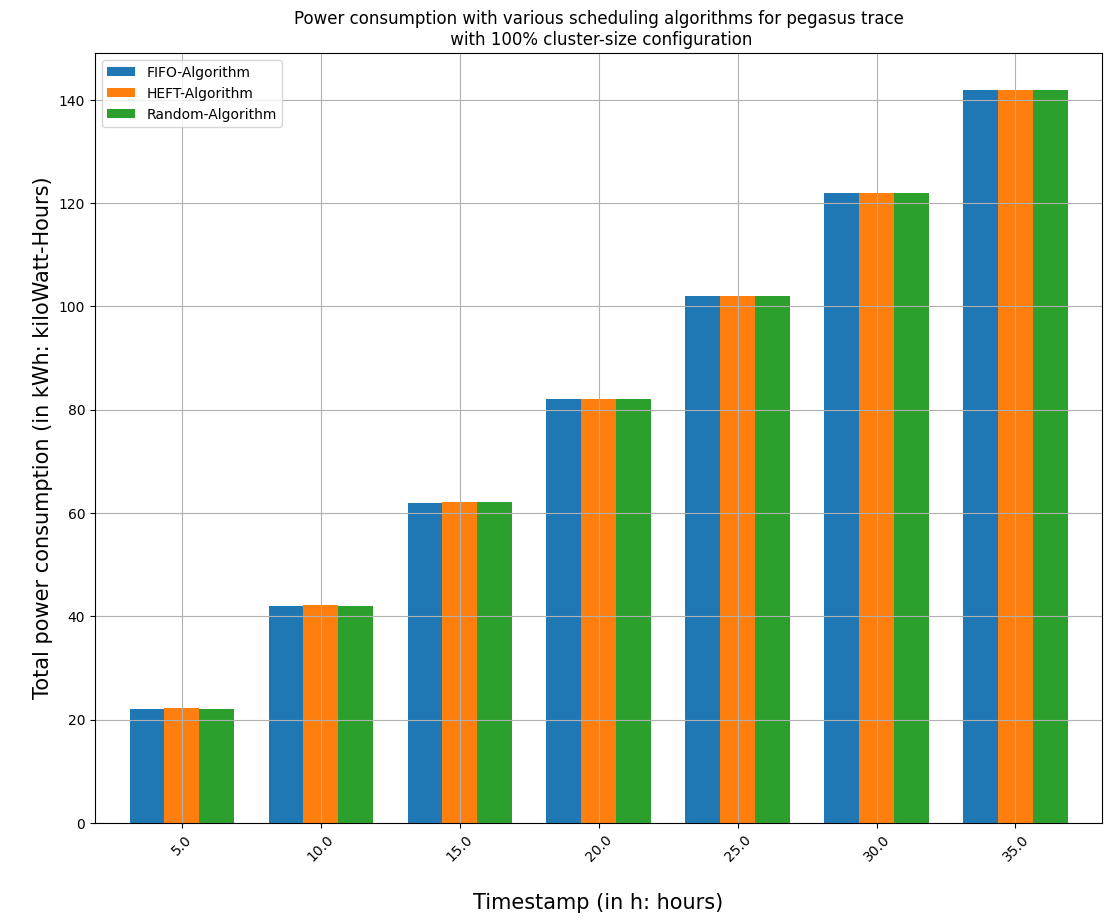

In [12]:
df1 = df_total_power_standard.drop(['serverId'], axis=1)
df2 = df_total_power_heft.drop(['serverId'], axis=1)
df3 = df_total_power_random.drop(['serverId'], axis=1)
# df4 = df_total_power_minmin.drop(['serverId'], axis=1)
# print(df1)
# Create a list of all the dataframes
dfs = [df1, df2, df3]

# Create a new dataframe with all the timestamps from all the dataframes
df_timestamps = pd.DataFrame({'timestamp': sorted(set(sum([df['timestamp'].tolist() for df in dfs], [])))})

# Merge the new dataframe with all the dataframes, filling in missing values with 0
df_merged = df_timestamps.merge(df1, how='left', on='timestamp', suffixes=('', '_x')).merge(df2, how='left', on='timestamp', suffixes=('', '_y')).merge(df3, how='left', on='timestamp', suffixes=('', '_z')).fillna(0)

# Convert watts to kiloWatt-hours
df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
# df_merged["energyUsage_w"] = df_merged["energyUsage_w"]/1000000
df_merged.rename(columns={'energyUsage': 'FIFO-Algorithm', 'energyUsage_y': 'HEFT-Algorithm', 'energyUsage_z': 'Random-Algorithm'}, inplace=True) #, 'energyUsage_w': 'MinMin-Algorithm'
df_merged['timestamp'] = df_merged['timestamp'].astype(int)

# Create a custom x-axis with every 599th value, due to very large number of elements in timestamp!
df_custom = df_merged[df_merged.index % 599 == 0]

# drop first column to have consistent distance of plots
df_custom = df_custom.drop(0)
df_custom = df_custom.reset_index(drop= True)
df_custom['timestamp_hours'] = round(df_custom['timestamp'] / 3600, 1) # convert seconds to hours
# print(df_custom)

ax_enlarged = df_custom.plot.bar(x='timestamp_hours', y=['FIFO-Algorithm','HEFT-Algorithm','Random-Algorithm'], title='Power consumption with various scheduling algorithms for pegasus trace\n with 100% cluster-size configuration', width=.75, figsize=(13, 10))
# ax_enlarged.set_xticks(custom_x)
# ax_enlarged.set_xticklabels(custom_x_labels)
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('\nTotal power consumption (in kWh: kiloWatt-Hours)', fontsize=15)
plt.xlabel('\nTimestamp (in h: hours)', fontsize=15)
# plt.figure(figsize=(14.5, 8.5))
# plt.set_size_inches(14.5, 8.5)
plt.grid(True)
plt.savefig('multiple_hosts_energy_plotted_trace_pegasus_60.png', bbox_inches='tight')
plt.show()

In [13]:
# df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
# df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
# df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
print(df_merged)

      timestamp  FIFO-Algorithm  HEFT-Algorithm  Random-Algorithm
0            30        0.056666        0.056666          0.056666
1            60        0.115000        0.115000          0.115000
2            90        0.173333        0.173333          0.173333
3           120        0.231666        0.231666          0.231666
4           150        0.290000        0.290000          0.290000
...         ...             ...             ...               ...
4194     125850      141.914757      142.028010        141.942903
4195     125880      141.948091      142.061343        141.976237
4196     125910      141.981424      142.094677        142.009570
4197     125940      142.014758      142.128010        142.042904
4198     125970      142.048091      142.161344        142.076237

[4199 rows x 4 columns]


In [14]:
# Reverse the column and find the first non-zero value for getting total power
last_non_zero_value_standard = df_merged[df_merged['FIFO-Algorithm'] != 0]['FIFO-Algorithm'].iloc[-1]
print(f"Total energy consumption in FIFO algorithm for executing given trace - {last_non_zero_value_standard} kWh")
last_non_zero_value_heft = df_merged[df_merged['HEFT-Algorithm'] != 0]['HEFT-Algorithm'].iloc[-1]
print(f"Total energy consumption in HEFT algorithm for executing given trace - {last_non_zero_value_heft} kWh")
last_non_zero_value_random = df_merged[df_merged['Random-Algorithm'] != 0]['Random-Algorithm'].iloc[-1]
print(f"Total energy consumption in Random algorithm for executing given trace - {last_non_zero_value_random} kWh")

Total energy consumption in FIFO algorithm for executing given trace - 142.0480910529712 kWh
Total energy consumption in HEFT algorithm for executing given trace - 142.1613436373055 kWh
Total energy consumption in Random algorithm for executing given trace - 142.07623717667266 kWh


In [15]:
total_energy_for_all_scheduling_algos = [last_non_zero_value_standard, last_non_zero_value_heft, last_non_zero_value_random]
print(total_energy_for_all_scheduling_algos)

[142.0480910529712, 142.1613436373055, 142.07623717667266]


In [16]:
min_value = min(total_energy_for_all_scheduling_algos)
dict = {0:"FIFO", 1:"HEFT", 2:"Random"}
min_index = total_energy_for_all_scheduling_algos.index(min_value)

# Calculate the percentage difference for each element compared to the minimum
percentages = []
for i, value in enumerate(total_energy_for_all_scheduling_algos):
    if i == min_index:
        continue  # Skip comparing the minimum value to itself
    percentage_difference = ((value - min_value) / min_value) * 100
    percentages.append((i, percentage_difference))

# Print the results
print(f"Resource scheduling algorithm {dict[min_index]} is the most optimal amongst the three scheduling algorithms analysed above!")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
for i, percentage in percentages:
    print(f"Scheduling algorithm {dict[i]} records {abs(percentage):.5f}% {'better' if percentage < 0 else 'worse'} energy-efficiency than the scheduling algorithm {dict[min_index]} for pegasus workload trace and 60% cluster-size configuration.")


Resource scheduling algorithm FIFO is the most optimal amongst the three scheduling algorithms analysed above!
----------------------------------------------------------------------------------------------------------------------------------------------
Scheduling algorithm HEFT records 0.07973% worse energy-efficiency than the scheduling algorithm FIFO for pegasus workload trace and 60% cluster-size configuration.
Scheduling algorithm Random records 0.01981% worse energy-efficiency than the scheduling algorithm FIFO for pegasus workload trace and 60% cluster-size configuration.
